# VGGCIFAR
### Abstract

## 0. Preparation

In [137]:
# import modules
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam

from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.utils import plot_model

from keras.datasets import cifar10
from keras.utils import np_utils

In [138]:
# consts
NUM_CLASSES = 10
BATCH_SIZE = 200
EPOCHS = 10

In [139]:
# plot function
def plot_history(history):
    # plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.show()
    
    # plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.show() 

## 1. Preprocessing

In [140]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [141]:
#split data into training and valuation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, 
    y_train, 
    test_size = 0.1,
    train_size=0.9, 
    random_state=42,
    shuffle=True
)

In [142]:
# data augmentation & normalization

#training data
trainGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

trainGenerator.fit(x_train)

# valuation data
valGenerator = ImageDataGenerator(
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valGenerator.fit(x_val)

## 2. Model Definition

In [143]:
# definition
model = Sequential([
    Conv2D(32, 3, input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Conv2D(32, 3, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, 3, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.25),
    
    Dense(NUM_CLASSES),
    Activation('softmax')
])

## 3. Learning

In [144]:
# optimizer
optimizer = Adam()

In [145]:
# compile
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
# Early stopping callback
# earlyStopping = EarlyStopping(patience=0, verbose=1)

In [147]:
# learning
history = model.fit_generator(
    trainGenerator.flow(x_train, y_train, BATCH_SIZE),
    epochs=EPOCHS,
    verbose=1,
    #callbacks=[earlyStopping],
    validation_data=valGenerator.flow(x_val, y_val, BATCH_SIZE)
)


Epoch 1/10
225/225 [==============================] - 202s 897ms/step - loss: 2.1988 - acc: 0.2879 - val_loss: 1.9913 - val_acc: 0.3376
Epoch 2/10
225/225 [==============================] - 204s 909ms/step - loss: 1.6925 - acc: 0.4369 - val_loss: 1.7390 - val_acc: 0.4128
Epoch 3/10
225/225 [==============================] - 191s 849ms/step - loss: 1.5367 - acc: 0.4959 - val_loss: 1.6462 - val_acc: 0.4508
Epoch 4/10
225/225 [==============================] - 195s 865ms/step - loss: 1.4587 - acc: 0.5225 - val_loss: 1.5185 - val_acc: 0.5006
Epoch 5/10
225/225 [==============================] - 207s 920ms/step - loss: 1.4012 - acc: 0.5436 - val_loss: 1.4550 - val_acc: 0.5090
Epoch 6/10
225/225 [==============================] - 243s 1s/step - loss: 1.3517 - acc: 0.5613 - val_loss: 1.5918 - val_acc: 0.4554
Epoch 7/10
225/225 [==============================] - 193s 857ms/step - loss: 1.3174 - acc: 0.5758 - val_loss: 1.3662 - val_acc: 0.5652
Epoch 8/10
225/225 [==============================]

## 4. Evaluation

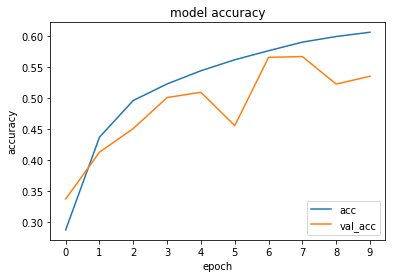

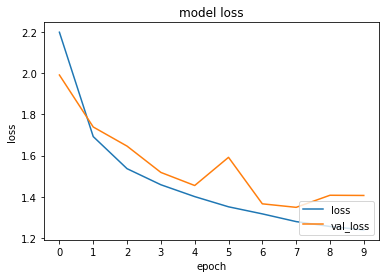

In [148]:
plot_history(history)

## 5. Summary